In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

In [2]:
features = pd.read_csv("D:/HAR/PAMAP2_Dataset/PAMAP_features.csv",index_col = 0)

In [3]:
features

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [4]:
features['activity_id'].value_counts()

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64

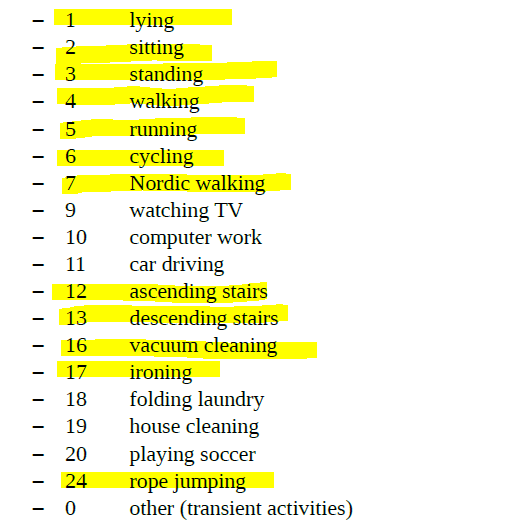

In [5]:
from IPython.display import Image 

Image("act1.png")

In [6]:
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

protocol_acts = [1,2,3,4,5,6,7,17,16,24,12,13]

Dev Dataset by Activity


ascending stairs     1539
walking              1525
standing             1220
lying                1203
Nordic walking       1196
sitting              1162
rope jumping         1099
cycling              1035
running               593
ironing               522
vacuum cleaning       428
descending stairs     251
Name: Activity Counts, dtype: int64

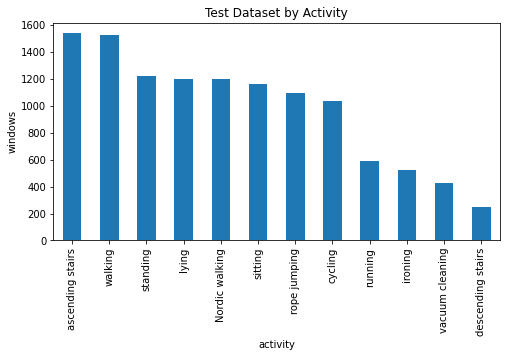

In [7]:
s = features.groupby('activity_id').count()['act_level']
s = s.rename("Activity Counts")
s.index = [activity_id[x] for x in protocol_acts]
print(('Dev Dataset by Activity'))
display(s.sort_values(ascending =False))
ax = s.sort_values(ascending =False).plot(kind='bar', figsize=(8,4))
_ = ax.set_ylabel('windows')
_ = ax.set_xlabel('activity')
_ = ax.set_title('Test Dataset by Activity') 

In [8]:
features['activity_id'].value_counts()

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64

In [9]:
features['sub_id'].value_counts()

sub_id
5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: count, dtype: int64

In [10]:
features['activity_id'].value_counts()

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64

In [11]:
'''
idx = features[features['activity_id'] == 17].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 4].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 7].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 16].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 6].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 5].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 12].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 13].index
features.drop(idx , inplace=True)
idx = features[features['activity_id'] == 24].index
features.drop(idx , inplace=True)
'''

"\nidx = features[features['activity_id'] == 17].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 4].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 7].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 16].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 6].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 5].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 12].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 13].index\nfeatures.drop(idx , inplace=True)\nidx = features[features['activity_id'] == 24].index\nfeatures.drop(idx , inplace=True)\n"

In [12]:
label=LabelEncoder()
features['activity_id']=label.fit_transform(features['activity_id'])
features.head()

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,10,light,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,3,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,4,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,10,light,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,2,light,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [13]:
features['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

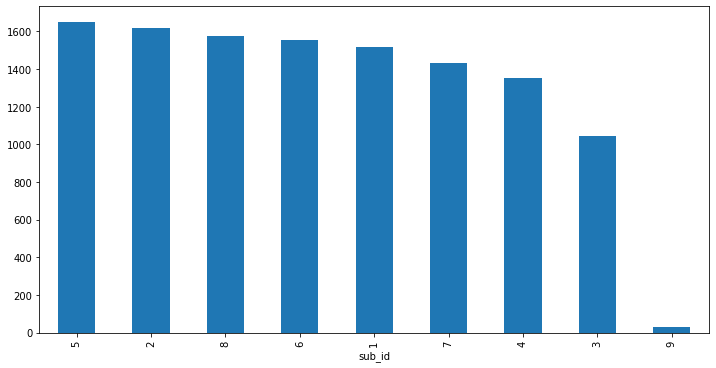

In [14]:
features['sub_id'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

In [15]:
features.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

In [16]:
'''
condition = np.where(features['sub_id'] == 6)
sample_features = features.iloc[condition]

condition2 = np.where(features['sub_id'] != 6)
features = features.iloc[condition2]
'''

"\ncondition = np.where(features['sub_id'] == 6)\nsample_features = features.iloc[condition]\n\ncondition2 = np.where(features['sub_id'] != 6)\nfeatures = features.iloc[condition2]\n"

In [17]:
features['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

In [18]:
f_col_all = ['hr_mean', 'hr_mean_normal', 'hr_std', 'hr_std_normal', 
             'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean','hand_acc_y_std', 
             'hand_acc_z_mean', 'hand_acc_z_std', 'hand_gyr_x_mean', 'hand_gyr_x_std', 
             'hand_gyr_y_mean', 'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std',
             'chest_acc_x_mean', 'chest_acc_x_std', 'chest_acc_y_mean', 'chest_acc_y_std', 
             'chest_acc_z_mean', 'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
             'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean', 'chest_gyr_z_std',
             'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean', 'ankle_acc_y_std', 
             'ankle_acc_z_mean', 'ankle_acc_z_std', 'ankle_gyr_x_mean', 'ankle_gyr_x_std',
             'ankle_gyr_y_mean', 'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std']
        
X_train = features[f_col_all]  # all features

X_OneHotEncoded = pd.get_dummies(X_train)  # all features and OneHotEncoded
f_col_OHE = list(X_OneHotEncoded.columns.values)

y_train = features["activity_id"].apply(lambda x: 1 if x== "Yes" else 0 )  # Labels
y_train = features["activity_id"]

In [19]:
f_col_all = ['hr_mean', 'hr_mean_normal', 'hr_std', 'hr_std_normal', 
             'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean','hand_acc_y_std', 
             'hand_acc_z_mean', 'hand_acc_z_std', 'hand_gyr_x_mean', 'hand_gyr_x_std', 
             'hand_gyr_y_mean', 'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std',
             'chest_acc_x_mean', 'chest_acc_x_std', 'chest_acc_y_mean', 'chest_acc_y_std', 
             'chest_acc_z_mean', 'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
             'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean', 'chest_gyr_z_std',
             'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean', 'ankle_acc_y_std', 
             'ankle_acc_z_mean', 'ankle_acc_z_std', 'ankle_gyr_x_mean', 'ankle_gyr_x_std',
             'ankle_gyr_y_mean', 'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std']
        
X_test = features[f_col_all]  # all features

X_OneHotEncoded = pd.get_dummies(X_test)  # all features and OneHotEncoded
f_col_OHE = list(X_OneHotEncoded.columns.values)

y_test = features["activity_id"].apply(lambda x: 1 if x== "Yes" else 0 )  # Labels
y_test = features["activity_id"]


In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X_OneHotEncoded, y, test_size=0.25, random_state=6)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (11773, 40)
y_train : (11773,)
X_test : (11773, 40)
y_test : (11773,)


In [21]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
from keras.models import Sequential

In [22]:
CLASSES = 12
INPUT_SIZE = X_train.shape[1]
INPUT_SIZE 

40

In [23]:
# custom activation function
def custom_activation(output):
	logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result

In [24]:
NEURON = 256

In [25]:
def define_discriminator(n_classes=CLASSES):
  # image input
  in_image = Input(shape=(INPUT_SIZE,))   
  # downsample
  fe = Dense(units=NEURON , activation='sigmoid')(in_image)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=NEURON , activation='sigmoid')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Dense(units=NEURON , activation='sigmoid')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # dropout
  fe = Dropout(0.4)(fe)
  # output layer nodes
  fe = Dense(n_classes)(fe)
  # supervised output
  c_out_layer = Activation('softmax')(fe)

  # define and compile supervised discriminator model
  
  c_model = Model(in_image, c_out_layer)
  c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.003, beta_1=0.5), metrics=['accuracy'])

  # unsupervised output
  d_out_layer = Lambda(custom_activation)(fe)

  # define and compile unsupervised discriminator model
  d_model = Model(in_image, d_out_layer)
  d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.003, beta_1=0.5))    
  print("-------------\n")    
  print("discriminator\n")
  print("-------------\n")    
  d_model.summary()
  return d_model, c_model

In [26]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=INPUT_SIZE):
	model = Sequential()
	model.add(Dense(200, activation='sigmoid', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(NEURON , activation='sigmoid'))
	model.add(Dense(n_outputs, activation='relu'))
	print("-------------\n")    
	print("generator\n")
	print("-------------\n")       
	model.summary()
	return model

In [27]:

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect image output from generator as input to discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and outputting a classification
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(lr=0.003, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)

	return model

In [28]:
# load the images
def load_real_samples(X,y):    
	X = X / 20
	print(X.shape, y.shape)
	return [X, y]

In [29]:
# select a supervised subset of the dataset, ensures classes are balanced

def select_supervised_samples(dataset2, n_classes=CLASSES):
  X, y = dataset2
  n_samples = X.shape[0] *0.03
  print("Sample :", n_samples)
  rand = randint(0,1000)
  #n_per_class = int(n_samples / n_classes)
  n_per_class = int(n_samples)
  return X.sample(n=n_per_class,replace=False, random_state=rand), y.sample(n=n_per_class,replace=False, random_state=rand)


In [30]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
  features, labels = dataset
	# choose random instances
  rand = randint(0, 1000)
	# select features and labels
  X = features.sample(n=n_samples,random_state=rand)
  labels = labels.sample(n=n_samples,random_state=rand)
	# generate class labels
  y = ones((n_samples, 1))
  return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	z_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = z_input.reshape(n_samples, latent_dim)
	return z_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict(z_input)
	# create class labels
	y = zeros((n_samples, 1))
	return images, y

In [31]:
# generate samples and save as a plot and save the model

def summarize_performance(step, g_model, c_model, latent_dim, dataset, acc_list, n_samples=100):
    
	# evaluate the classifier model
	X, y = dataset
	_, acc = c_model.evaluate(X, y, verbose=0)
	print('Classifier Accuracy: %.3f%%' % (acc * 100))
	acc_list.append(acc)

    
	# save the generator model
	filename2 = 'C:/Users/GC/models/g_model_%04d.h5' % (step+1)
	#g_model.save(filename2)
    
	# save the classifier model
	filename3 = 'C:/Users/GC/models/c_model_%04d.h5' % (step+1)
	#c_model.save(filename3)
	print('>Saved:  %s and %s' % (filename2, filename3))

In [32]:
d_supervised_losses=[]
g_supervised_losses=[]
c_accuray=[]
iteration_checkpoints=[]


# train the generator and discriminator
def train(g_model, d_model, c_model, gan_model, dataset, dataset2, latent_dim, acc_list, n_epochs=160, n_batch=100):
    
	# select supervised dataset
	X_sup, y_sup = select_supervised_samples(dataset2)
	print("Class Balance: \n", y_sup.value_counts())    
	print("Select supervised dataset: ", X_sup.shape, y_sup.shape)
    
	# calculate the number of batches per training epoch
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
    
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
    
	# calculate the size of half a batch of samples
	half_batch = int(n_batch / 2)
	print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))
    
	# manually enumerate epochs
	for i in range(n_steps):
		# update supervised discriminator (c)
		[Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
		c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
		# update unsupervised discriminator (d)
		[X_real, _], y_real = generate_real_samples(dataset, half_batch)
		d_loss1 = d_model.train_on_batch(X_real, y_real)
		X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		d_loss2 = d_model.train_on_batch(X_fake, y_fake)
		# update generator (g)
		X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
		g_loss = gan_model.train_on_batch(X_gan, y_gan)
		# summarize loss on this batch
		print('>%d, c[%.3f,%.0f%%], d[%.3f,%.3f], g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))                

        # evaluate the model performance every so often                        
        
		if (i+1) % (100) == 0:            
			_, train_acc = c_model.evaluate(X, y, verbose=0)            
			print('>>> Accuracy: %.3f%%' % (train_acc * 100))

			summarize_performance(i, g_model, c_model, latent_dim, dataset, acc_list)
			d_supervised_losses.append(d_loss1)
			g_supervised_losses.append(g_loss)
			c_accuray.append(c_acc)
			iteration_checkpoints.append(i+1)            


In [33]:
#accuracy list for each epochs
acc_list = []

# size of the latent space
latent_dim = 100
# create the discriminator models
d_model, c_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(X_test, y_test)
X, y = dataset

dataset2 = load_real_samples(X_train, y_train)
X2, y2 = dataset2

print("Total dataset: ", X.shape, y.shape)
print("Sample dataset: ", X2.shape, y2.shape)

-------------

discriminator

-------------

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 256)               10496     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_2

(11773, 40) (11773,)
(11773, 40) (11773,)
Total dataset:  (11773, 40) (11773,)
Sample dataset:  (11773, 40) (11773,)


In [34]:
import time
start_time = time.time()
print("Trainig Start")

train(g_model, d_model, c_model, gan_model, dataset, dataset2, latent_dim, acc_list)

print("End")
print("Time: {:.1f}min".format(((time.time() - start_time))/60))

Trainig Start
Sample : 353.19
Class Balance: 
 activity_id
10    46
1     43
6     42
0     40
5     37
2     33
3     28
9     27
8     18
4     16
7     16
11     7
Name: count, dtype: int64
Select supervised dataset:  (353, 40) (353,)
n_epochs=160, n_batch=100, 1/2=50, b/e=117, steps=18720
2/2 [==============================] - 0s 3ms/step
>1, c[3.208,2%], d[0.055,3.324], g[0.051]
2/2 [==============================] - 0s 3ms/step
>2, c[2.606,10%], d[0.053,2.859], g[0.076]
2/2 [==============================] - 0s 5ms/step
>3, c[2.616,12%], d[0.077,2.498], g[0.110]
2/2 [==============================] - 0s 4ms/step
>4, c[2.697,8%], d[0.115,2.201], g[0.152]
2/2 [==============================] - 0s 2ms/step
>5, c[2.408,12%], d[0.151,1.882], g[0.205]
2/2 [==============================] - 0s 2ms/step
>6, c[2.479,12%], d[0.201,1.656], g[0.262]
2/2 [==============================] - 0s 3ms/step
>7, c[2.591,6%], d[0.242,1.459], g[0.326]
2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 3ms/step
>84, c[2.336,24%], d[0.584,0.979], g[0.580]
2/2 [==============================] - 0s 2ms/step
>85, c[2.269,14%], d[0.630,0.950], g[0.590]
2/2 [==============================] - 0s 3ms/step
>86, c[2.477,8%], d[0.645,0.929], g[0.581]
2/2 [==============================] - 0s 3ms/step
>87, c[2.396,14%], d[0.617,0.890], g[0.608]
2/2 [==============================] - 0s 2ms/step
>88, c[2.370,22%], d[0.617,0.905], g[0.614]
2/2 [==============================] - 0s 2ms/step
>89, c[2.426,14%], d[0.629,0.845], g[0.625]
2/2 [==============================] - 0s 5ms/step
>90, c[2.328,24%], d[0.630,0.850], g[0.641]
2/2 [==============================] - 0s 2ms/step
>91, c[2.426,10%], d[0.669,0.831], g[0.652]
2/2 [==============================] - 0s 3ms/step
>92, c[2.464,12%], d[0.638,0.843], g[0.661]
2/2 [==============================] - 0s 3ms/step
>93, c[2.469,14%], d[0.616,0.812], g[0.675]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 4ms/step
>168, c[2.107,18%], d[0.243,0.263], g[1.670]
2/2 [==============================] - 0s 2ms/step
>169, c[2.150,16%], d[0.300,0.243], g[1.682]
2/2 [==============================] - 0s 2ms/step
>170, c[2.169,22%], d[0.298,0.236], g[1.751]
2/2 [==============================] - 0s 3ms/step
>171, c[1.946,24%], d[0.317,0.234], g[1.733]
2/2 [==============================] - 0s 3ms/step
>172, c[2.052,24%], d[0.252,0.247], g[1.795]
2/2 [==============================] - 0s 2ms/step
>173, c[2.085,28%], d[0.235,0.234], g[1.874]
2/2 [==============================] - 0s 3ms/step
>174, c[2.128,14%], d[0.309,0.199], g[1.775]
2/2 [==============================] - 0s 2ms/step
>175, c[1.987,26%], d[0.333,0.228], g[1.686]
2/2 [==============================] - 0s 3ms/step
>176, c[2.035,26%], d[0.372,0.249], g[1.677]
2/2 [==============================] - 0s 2ms/step
>177, c[1.974,36%], d[0.178,0.223], g[1.740]
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step
>252, c[1.566,34%], d[0.205,0.165], g[2.190]
2/2 [==============================] - 0s 3ms/step
>253, c[1.584,32%], d[0.168,0.160], g[2.235]
2/2 [==============================] - 0s 2ms/step
>254, c[1.654,38%], d[0.211,0.143], g[2.305]
2/2 [==============================] - 0s 2ms/step
>255, c[1.485,42%], d[0.184,0.157], g[2.374]
2/2 [==============================] - 0s 3ms/step
>256, c[1.659,36%], d[0.197,0.131], g[2.458]
2/2 [==============================] - 0s 3ms/step
>257, c[1.663,46%], d[0.172,0.110], g[2.489]
2/2 [==============================] - 0s 2ms/step
>258, c[1.555,40%], d[0.156,0.123], g[2.588]
2/2 [==============================] - 0s 3ms/step
>259, c[1.702,36%], d[0.138,0.108], g[2.633]
2/2 [==============================] - 0s 3ms/step
>260, c[1.607,42%], d[0.133,0.092], g[2.738]
2/2 [==============================] - 0s 3ms/step
>261, c[1.544,46%], d[0.121,0.092], g[2.873]
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step
>336, c[1.266,56%], d[0.020,0.012], g[4.691]
2/2 [==============================] - 0s 3ms/step
>337, c[1.517,32%], d[0.035,0.009], g[4.568]
2/2 [==============================] - 0s 3ms/step
>338, c[1.423,42%], d[0.022,0.011], g[4.614]
2/2 [==============================] - 0s 3ms/step
>339, c[1.332,46%], d[0.021,0.013], g[4.637]
2/2 [==============================] - 0s 3ms/step
>340, c[1.236,52%], d[0.017,0.013], g[4.590]
2/2 [==============================] - 0s 3ms/step
>341, c[1.141,58%], d[0.025,0.011], g[4.661]
2/2 [==============================] - 0s 3ms/step
>342, c[1.168,48%], d[0.016,0.013], g[4.522]
2/2 [==============================] - 0s 3ms/step
>343, c[1.133,64%], d[0.023,0.016], g[4.522]
2/2 [==============================] - 0s 2ms/step
>344, c[1.176,54%], d[0.015,0.016], g[4.450]
2/2 [==============================] - 0s 3ms/step
>345, c[1.138,52%], d[0.020,0.029], g[4.154]
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step
>420, c[1.103,64%], d[0.021,0.012], g[4.727]
2/2 [==============================] - 0s 4ms/step
>421, c[1.249,52%], d[0.009,0.013], g[4.874]
2/2 [==============================] - 0s 2ms/step
>422, c[1.077,56%], d[0.008,0.012], g[4.833]
2/2 [==============================] - 0s 3ms/step
>423, c[0.984,74%], d[0.018,0.011], g[4.763]
2/2 [==============================] - 0s 2ms/step
>424, c[1.190,56%], d[0.011,0.010], g[4.861]
2/2 [==============================] - 0s 3ms/step
>425, c[1.277,48%], d[0.025,0.010], g[4.841]
2/2 [==============================] - 0s 3ms/step
>426, c[1.072,52%], d[0.009,0.010], g[4.804]
2/2 [==============================] - 0s 3ms/step
>427, c[1.053,56%], d[0.008,0.012], g[4.980]
2/2 [==============================] - 0s 3ms/step
>428, c[1.159,58%], d[0.015,0.008], g[4.905]
2/2 [==============================] - 0s 3ms/step
>429, c[1.196,56%], d[0.026,0.010], g[4.840]
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step
>504, c[1.010,64%], d[0.009,0.005], g[5.402]
2/2 [==============================] - 0s 3ms/step
>505, c[1.029,60%], d[0.005,0.006], g[5.333]
2/2 [==============================] - 0s 2ms/step
>506, c[0.932,64%], d[0.010,0.007], g[5.279]
2/2 [==============================] - 0s 3ms/step
>507, c[0.946,66%], d[0.006,0.007], g[5.404]
2/2 [==============================] - 0s 3ms/step
>508, c[0.870,68%], d[0.006,0.007], g[5.440]
2/2 [==============================] - 0s 3ms/step
>509, c[0.959,60%], d[0.009,0.006], g[5.390]
2/2 [==============================] - 0s 3ms/step
>510, c[1.063,52%], d[0.006,0.007], g[5.493]
2/2 [==============================] - 0s 3ms/step
>511, c[1.106,60%], d[0.007,0.005], g[5.331]
2/2 [==============================] - 0s 2ms/step
>512, c[0.981,64%], d[0.006,0.006], g[5.250]
2/2 [==============================] - 0s 3ms/step
>513, c[1.020,56%], d[0.008,0.007], g[5.525]
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step
>589, c[1.060,64%], d[0.011,0.004], g[5.931]
2/2 [==============================] - 0s 2ms/step
>590, c[0.845,74%], d[0.008,0.005], g[5.779]
2/2 [==============================] - 0s 3ms/step
>591, c[0.964,64%], d[0.004,0.004], g[5.737]
2/2 [==============================] - 0s 3ms/step
>592, c[1.020,58%], d[0.004,0.005], g[5.544]
2/2 [==============================] - 0s 3ms/step
>593, c[0.992,54%], d[0.004,0.004], g[5.717]
2/2 [==============================] - 0s 3ms/step
>594, c[0.950,64%], d[0.005,0.005], g[5.652]
2/2 [==============================] - 0s 3ms/step
>595, c[0.999,60%], d[0.004,0.005], g[5.688]
2/2 [==============================] - 0s 2ms/step
>596, c[1.011,54%], d[0.002,0.004], g[5.733]
2/2 [==============================] - 0s 2ms/step
>597, c[1.018,52%], d[0.010,0.004], g[5.746]
2/2 [==============================] - 0s 3ms/step
>598, c[0.974,54%], d[0.010,0.006], g[5.677]
2/2 [==============================] - 0

2/2 [==============================] - 0s 5ms/step
>673, c[0.894,56%], d[0.006,0.004], g[5.886]
2/2 [==============================] - 0s 3ms/step
>674, c[0.991,66%], d[0.006,0.004], g[5.831]
2/2 [==============================] - 0s 3ms/step
>675, c[1.032,62%], d[0.005,0.003], g[5.756]
2/2 [==============================] - 0s 2ms/step
>676, c[0.872,60%], d[0.004,0.004], g[5.859]
2/2 [==============================] - 0s 3ms/step
>677, c[0.887,60%], d[0.005,0.004], g[5.869]
2/2 [==============================] - 0s 2ms/step
>678, c[0.989,52%], d[0.011,0.004], g[5.803]
2/2 [==============================] - 0s 2ms/step
>679, c[1.051,58%], d[0.002,0.004], g[5.814]
2/2 [==============================] - 0s 3ms/step
>680, c[1.079,54%], d[0.005,0.006], g[5.551]
2/2 [==============================] - 0s 2ms/step
>681, c[0.805,76%], d[0.004,0.004], g[5.792]
2/2 [==============================] - 0s 3ms/step
>682, c[0.950,54%], d[0.010,0.003], g[5.925]
2/2 [==============================] - 0

>756, c[0.866,62%], d[0.005,0.004], g[6.111]
2/2 [==============================] - 0s 2ms/step
>757, c[0.897,68%], d[0.003,0.003], g[6.049]
2/2 [==============================] - 0s 3ms/step
>758, c[0.705,74%], d[0.002,0.003], g[6.095]
2/2 [==============================] - 0s 2ms/step
>759, c[0.807,62%], d[0.002,0.003], g[5.986]
2/2 [==============================] - 0s 2ms/step
>760, c[0.766,68%], d[0.004,0.004], g[6.034]
2/2 [==============================] - 0s 2ms/step
>761, c[0.916,66%], d[0.003,0.004], g[6.104]
2/2 [==============================] - 0s 3ms/step
>762, c[0.785,68%], d[0.008,0.003], g[6.078]
2/2 [==============================] - 0s 2ms/step
>763, c[0.733,74%], d[0.005,0.003], g[6.081]
2/2 [==============================] - 0s 2ms/step
>764, c[0.908,62%], d[0.004,0.003], g[5.991]
2/2 [==============================] - 0s 3ms/step
>765, c[0.675,82%], d[0.003,0.004], g[6.004]
2/2 [==============================] - 0s 3ms/step
>766, c[0.785,72%], d[0.006,0.003], g[5.

2/2 [==============================] - 0s 2ms/step
>840, c[0.774,76%], d[0.002,0.002], g[6.406]
2/2 [==============================] - 0s 2ms/step
>841, c[0.922,60%], d[0.003,0.002], g[6.409]
2/2 [==============================] - 0s 3ms/step
>842, c[0.845,76%], d[0.005,0.003], g[6.326]
2/2 [==============================] - 0s 3ms/step
>843, c[0.821,68%], d[0.004,0.003], g[6.357]
2/2 [==============================] - 0s 3ms/step
>844, c[0.781,70%], d[0.002,0.003], g[6.246]
2/2 [==============================] - 0s 5ms/step
>845, c[0.674,68%], d[0.002,0.003], g[6.334]
2/2 [==============================] - 0s 3ms/step
>846, c[0.736,66%], d[0.002,0.002], g[6.183]
2/2 [==============================] - 0s 3ms/step
>847, c[0.777,68%], d[0.004,0.002], g[6.282]
2/2 [==============================] - 0s 2ms/step
>848, c[0.779,70%], d[0.003,0.002], g[6.558]
2/2 [==============================] - 0s 2ms/step
>849, c[0.724,78%], d[0.002,0.002], g[6.369]
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step
>924, c[0.790,72%], d[0.003,0.003], g[6.604]
2/2 [==============================] - 0s 2ms/step
>925, c[0.656,66%], d[0.002,0.002], g[6.369]
2/2 [==============================] - 0s 3ms/step
>926, c[0.872,66%], d[0.003,0.002], g[6.446]
2/2 [==============================] - 0s 2ms/step
>927, c[0.719,74%], d[0.004,0.002], g[6.444]
2/2 [==============================] - 0s 3ms/step
>928, c[0.737,64%], d[0.004,0.002], g[6.528]
2/2 [==============================] - 0s 2ms/step
>929, c[0.850,60%], d[0.005,0.002], g[6.417]
2/2 [==============================] - 0s 2ms/step
>930, c[0.860,56%], d[0.002,0.002], g[6.414]
2/2 [==============================] - 0s 2ms/step
>931, c[0.780,64%], d[0.005,0.002], g[6.406]
2/2 [==============================] - 0s 3ms/step
>932, c[0.743,76%], d[0.002,0.002], g[6.471]
2/2 [==============================] - 0s 4ms/step
>933, c[0.705,68%], d[0.004,0.003], g[6.676]
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step
>1008, c[0.620,78%], d[0.001,0.002], g[6.528]
2/2 [==============================] - 0s 2ms/step
>1009, c[0.696,70%], d[0.003,0.002], g[6.571]
2/2 [==============================] - 0s 2ms/step
>1010, c[0.580,76%], d[0.003,0.003], g[6.649]
2/2 [==============================] - 0s 2ms/step
>1011, c[0.498,84%], d[0.002,0.002], g[6.584]
2/2 [==============================] - 0s 3ms/step
>1012, c[0.727,66%], d[0.003,0.002], g[6.570]
2/2 [==============================] - 0s 3ms/step
>1013, c[0.525,82%], d[0.001,0.002], g[6.599]
2/2 [==============================] - 0s 2ms/step
>1014, c[0.604,78%], d[0.001,0.001], g[6.520]
2/2 [==============================] - 0s 3ms/step
>1015, c[0.757,66%], d[0.001,0.002], g[6.605]
2/2 [==============================] - 0s 2ms/step
>1016, c[0.938,60%], d[0.002,0.003], g[6.571]
2/2 [==============================] - 0s 2ms/step
>1017, c[0.661,78%], d[0.006,0.002], g[6.757]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>1092, c[0.748,72%], d[0.001,0.002], g[6.742]
2/2 [==============================] - 0s 3ms/step
>1093, c[0.726,70%], d[0.002,0.002], g[6.646]
2/2 [==============================] - 0s 2ms/step
>1094, c[0.593,76%], d[0.003,0.001], g[6.831]
2/2 [==============================] - 0s 3ms/step
>1095, c[0.704,70%], d[0.001,0.002], g[6.754]
2/2 [==============================] - 0s 2ms/step
>1096, c[0.665,68%], d[0.003,0.002], g[6.760]
2/2 [==============================] - 0s 2ms/step
>1097, c[0.585,74%], d[0.001,0.002], g[6.837]
2/2 [==============================] - 0s 2ms/step
>1098, c[0.609,74%], d[0.003,0.002], g[6.886]
2/2 [==============================] - 0s 2ms/step
>1099, c[0.667,72%], d[0.002,0.002], g[6.825]
2/2 [==============================] - 0s 2ms/step
>1100, c[0.522,80%], d[0.003,0.002], g[6.776]
>>> Accuracy: 74.042%
Classifier Accuracy: 74.042%
>Saved:  C:/Users/GC/models/g_model_1100.h5 and C:/Users/GC/models/c_model_1

2/2 [==============================] - 0s 3ms/step
>1175, c[0.725,68%], d[0.002,0.001], g[6.910]
2/2 [==============================] - 0s 3ms/step
>1176, c[0.530,76%], d[0.002,0.001], g[7.117]
2/2 [==============================] - 0s 2ms/step
>1177, c[0.534,78%], d[0.001,0.001], g[6.937]
2/2 [==============================] - 0s 2ms/step
>1178, c[0.754,68%], d[0.001,0.002], g[7.168]
2/2 [==============================] - 0s 4ms/step
>1179, c[0.605,80%], d[0.001,0.001], g[7.074]
2/2 [==============================] - 0s 3ms/step
>1180, c[0.591,80%], d[0.002,0.001], g[7.043]
2/2 [==============================] - 0s 3ms/step
>1181, c[0.774,68%], d[0.001,0.001], g[7.068]
2/2 [==============================] - 0s 2ms/step
>1182, c[0.553,78%], d[0.002,0.001], g[7.070]
2/2 [==============================] - 0s 2ms/step
>1183, c[0.542,82%], d[0.001,0.001], g[7.222]
2/2 [==============================] - 0s 4ms/step
>1184, c[0.590,80%], d[0.001,0.001], g[7.074]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>1258, c[0.504,82%], d[0.001,0.001], g[7.078]
2/2 [==============================] - 0s 2ms/step
>1259, c[0.548,84%], d[0.001,0.001], g[7.209]
2/2 [==============================] - 0s 3ms/step
>1260, c[0.573,78%], d[0.001,0.002], g[7.065]
2/2 [==============================] - 0s 3ms/step
>1261, c[0.651,70%], d[0.001,0.002], g[7.208]
2/2 [==============================] - 0s 4ms/step
>1262, c[0.646,72%], d[0.001,0.002], g[7.205]
2/2 [==============================] - 0s 3ms/step
>1263, c[0.496,82%], d[0.001,0.002], g[7.077]
2/2 [==============================] - 0s 3ms/step
>1264, c[0.478,80%], d[0.001,0.001], g[7.073]
2/2 [==============================] - 0s 3ms/step
>1265, c[0.688,76%], d[0.001,0.001], g[7.136]
2/2 [==============================] - 0s 3ms/step
>1266, c[0.624,78%], d[0.003,0.001], g[6.972]
2/2 [==============================] - 0s 3ms/step
>1267, c[0.632,76%], d[0.001,0.001], g[7.035]
2/2 [=========================

2/2 [==============================] - 0s 8ms/step
>1341, c[0.342,92%], d[0.001,0.001], g[7.459]
2/2 [==============================] - 0s 5ms/step
>1342, c[0.493,82%], d[0.001,0.001], g[7.131]
2/2 [==============================] - 0s 4ms/step
>1343, c[0.592,74%], d[0.001,0.001], g[7.271]
2/2 [==============================] - 0s 4ms/step
>1344, c[0.599,78%], d[0.000,0.001], g[7.180]
2/2 [==============================] - 0s 3ms/step
>1345, c[0.539,76%], d[0.001,0.001], g[7.325]
2/2 [==============================] - 0s 2ms/step
>1346, c[0.505,82%], d[0.001,0.001], g[7.346]
2/2 [==============================] - 0s 20ms/step
>1347, c[0.514,82%], d[0.001,0.001], g[7.304]
2/2 [==============================] - 0s 3ms/step
>1348, c[0.456,86%], d[0.001,0.001], g[7.398]
2/2 [==============================] - 0s 5ms/step
>1349, c[0.570,80%], d[0.002,0.001], g[7.343]
2/2 [==============================] - 0s 2ms/step
>1350, c[0.475,84%], d[0.001,0.001], g[7.264]
2/2 [========================

2/2 [==============================] - 0s 3ms/step
>1424, c[0.432,82%], d[0.001,0.001], g[7.405]
2/2 [==============================] - 0s 3ms/step
>1425, c[0.735,78%], d[0.001,0.001], g[7.479]
2/2 [==============================] - 0s 2ms/step
>1426, c[0.650,72%], d[0.001,0.001], g[7.468]
2/2 [==============================] - 0s 2ms/step
>1427, c[0.638,84%], d[0.001,0.001], g[7.484]
2/2 [==============================] - 0s 3ms/step
>1428, c[0.562,82%], d[0.001,0.001], g[7.436]
2/2 [==============================] - 0s 3ms/step
>1429, c[0.426,82%], d[0.001,0.001], g[7.503]
2/2 [==============================] - 0s 3ms/step
>1430, c[0.575,74%], d[0.001,0.001], g[7.425]
2/2 [==============================] - 0s 3ms/step
>1431, c[0.386,88%], d[0.001,0.001], g[7.617]
2/2 [==============================] - 0s 4ms/step
>1432, c[0.701,74%], d[0.000,0.001], g[7.374]
2/2 [==============================] - 0s 2ms/step
>1433, c[0.636,76%], d[0.001,0.001], g[7.436]
2/2 [=========================

2/2 [==============================] - 0s 4ms/step
>1507, c[0.529,84%], d[0.001,0.001], g[7.521]
2/2 [==============================] - 0s 3ms/step
>1508, c[0.667,72%], d[0.001,0.001], g[7.394]
2/2 [==============================] - 0s 2ms/step
>1509, c[0.632,80%], d[0.001,0.001], g[7.403]
2/2 [==============================] - 0s 2ms/step
>1510, c[0.402,82%], d[0.000,0.001], g[7.410]
2/2 [==============================] - 0s 3ms/step
>1511, c[0.378,90%], d[0.001,0.001], g[7.556]
2/2 [==============================] - 0s 4ms/step
>1512, c[0.372,90%], d[0.000,0.001], g[7.469]
2/2 [==============================] - 0s 3ms/step
>1513, c[0.389,90%], d[0.000,0.001], g[7.515]
2/2 [==============================] - 0s 2ms/step
>1514, c[0.342,82%], d[0.001,0.001], g[7.748]
2/2 [==============================] - 0s 2ms/step
>1515, c[0.587,74%], d[0.001,0.001], g[7.691]
2/2 [==============================] - 0s 2ms/step
>1516, c[0.535,88%], d[0.001,0.001], g[7.504]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>1591, c[0.457,84%], d[0.001,0.001], g[7.579]
2/2 [==============================] - 0s 3ms/step
>1592, c[0.544,82%], d[0.000,0.001], g[7.731]
2/2 [==============================] - 0s 2ms/step
>1593, c[0.455,90%], d[0.001,0.001], g[7.526]
2/2 [==============================] - 0s 3ms/step
>1594, c[0.629,84%], d[0.001,0.001], g[7.604]
2/2 [==============================] - 0s 3ms/step
>1595, c[0.481,82%], d[0.001,0.001], g[7.484]
2/2 [==============================] - 0s 2ms/step
>1596, c[0.396,80%], d[0.000,0.001], g[7.659]
2/2 [==============================] - 0s 3ms/step
>1597, c[0.537,86%], d[0.001,0.001], g[7.760]
2/2 [==============================] - 0s 2ms/step
>1598, c[0.509,78%], d[0.000,0.001], g[7.504]
2/2 [==============================] - 0s 2ms/step
>1599, c[0.431,86%], d[0.001,0.001], g[7.660]
2/2 [==============================] - 0s 3ms/step
>1600, c[0.459,86%], d[0.000,0.001], g[7.723]
>>> Accuracy: 79.130%
Classifi

2/2 [==============================] - 0s 6ms/step
>1674, c[0.475,78%], d[0.000,0.000], g[7.776]
2/2 [==============================] - 0s 4ms/step
>1675, c[0.270,96%], d[0.001,0.001], g[7.898]
2/2 [==============================] - 0s 3ms/step
>1676, c[0.443,86%], d[0.001,0.001], g[7.786]
2/2 [==============================] - 0s 2ms/step
>1677, c[0.460,80%], d[0.001,0.001], g[7.738]
2/2 [==============================] - 0s 2ms/step
>1678, c[0.297,90%], d[0.000,0.001], g[7.907]
2/2 [==============================] - 0s 3ms/step
>1679, c[0.569,74%], d[0.001,0.001], g[7.739]
2/2 [==============================] - 0s 3ms/step
>1680, c[0.330,88%], d[0.001,0.001], g[7.766]
2/2 [==============================] - 0s 4ms/step
>1681, c[0.422,84%], d[0.001,0.001], g[7.731]
2/2 [==============================] - 0s 2ms/step
>1682, c[0.540,80%], d[0.000,0.001], g[7.972]
2/2 [==============================] - 0s 3ms/step
>1683, c[0.254,92%], d[0.000,0.001], g[7.766]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>1757, c[0.393,90%], d[0.000,0.001], g[7.862]
2/2 [==============================] - 0s 3ms/step
>1758, c[0.380,82%], d[0.000,0.000], g[7.875]
2/2 [==============================] - 0s 3ms/step
>1759, c[0.284,88%], d[0.000,0.001], g[7.948]
2/2 [==============================] - 0s 3ms/step
>1760, c[0.483,90%], d[0.000,0.001], g[7.915]
2/2 [==============================] - 0s 3ms/step
>1761, c[0.300,92%], d[0.000,0.001], g[7.724]
2/2 [==============================] - 0s 2ms/step
>1762, c[0.410,80%], d[0.000,0.000], g[7.743]
2/2 [==============================] - 0s 2ms/step
>1763, c[0.354,86%], d[0.000,0.000], g[7.892]
2/2 [==============================] - 0s 2ms/step
>1764, c[0.275,92%], d[0.000,0.001], g[7.806]
2/2 [==============================] - 0s 3ms/step
>1765, c[0.465,80%], d[0.001,0.001], g[7.890]
2/2 [==============================] - 0s 3ms/step
>1766, c[0.391,82%], d[0.001,0.001], g[7.804]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>1840, c[0.547,78%], d[0.001,0.000], g[8.072]
2/2 [==============================] - 0s 3ms/step
>1841, c[0.386,86%], d[0.000,0.000], g[8.101]
2/2 [==============================] - 0s 2ms/step
>1842, c[0.463,82%], d[0.000,0.001], g[7.904]
2/2 [==============================] - 0s 2ms/step
>1843, c[0.322,86%], d[0.000,0.001], g[8.164]
2/2 [==============================] - 0s 3ms/step
>1844, c[0.335,96%], d[0.000,0.001], g[7.913]
2/2 [==============================] - 0s 2ms/step
>1845, c[0.368,90%], d[0.000,0.001], g[8.106]
2/2 [==============================] - 0s 2ms/step
>1846, c[0.467,88%], d[0.000,0.001], g[8.113]
2/2 [==============================] - 0s 3ms/step
>1847, c[0.487,80%], d[0.000,0.000], g[8.076]
2/2 [==============================] - 0s 3ms/step
>1848, c[0.331,90%], d[0.000,0.000], g[7.999]
2/2 [==============================] - 0s 3ms/step
>1849, c[0.310,86%], d[0.000,0.001], g[8.021]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>1923, c[0.441,84%], d[0.001,0.001], g[8.116]
2/2 [==============================] - 0s 3ms/step
>1924, c[0.304,88%], d[0.000,0.000], g[8.189]
2/2 [==============================] - 0s 2ms/step
>1925, c[0.355,90%], d[0.000,0.001], g[8.271]
2/2 [==============================] - 0s 3ms/step
>1926, c[0.583,84%], d[0.001,0.000], g[8.279]
2/2 [==============================] - 0s 2ms/step
>1927, c[0.347,86%], d[0.001,0.001], g[7.960]
2/2 [==============================] - 0s 2ms/step
>1928, c[0.396,82%], d[0.000,0.001], g[8.213]
2/2 [==============================] - 0s 2ms/step
>1929, c[0.349,90%], d[0.000,0.000], g[8.264]
2/2 [==============================] - 0s 2ms/step
>1930, c[0.342,94%], d[0.001,0.001], g[8.301]
2/2 [==============================] - 0s 3ms/step
>1931, c[0.397,92%], d[0.000,0.000], g[8.255]
2/2 [==============================] - 0s 4ms/step
>1932, c[0.374,86%], d[0.000,0.000], g[8.180]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>2006, c[0.496,82%], d[0.001,0.000], g[8.218]
2/2 [==============================] - 0s 2ms/step
>2007, c[0.448,90%], d[0.000,0.001], g[8.126]
2/2 [==============================] - 0s 3ms/step
>2008, c[0.394,94%], d[0.000,0.000], g[8.344]
2/2 [==============================] - 0s 3ms/step
>2009, c[0.393,88%], d[0.001,0.000], g[8.160]
2/2 [==============================] - 0s 2ms/step
>2010, c[0.462,82%], d[0.000,0.000], g[8.389]
2/2 [==============================] - 0s 3ms/step
>2011, c[0.375,78%], d[0.000,0.000], g[8.355]
2/2 [==============================] - 0s 3ms/step
>2012, c[0.344,88%], d[0.001,0.000], g[8.182]
2/2 [==============================] - 0s 3ms/step
>2013, c[0.325,88%], d[0.000,0.000], g[8.257]
2/2 [==============================] - 0s 2ms/step
>2014, c[0.374,86%], d[0.000,0.001], g[8.338]
2/2 [==============================] - 0s 2ms/step
>2015, c[0.277,88%], d[0.000,0.001], g[8.358]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>2090, c[0.462,90%], d[0.000,0.000], g[8.089]
2/2 [==============================] - 0s 3ms/step
>2091, c[0.292,86%], d[0.000,0.000], g[8.523]
2/2 [==============================] - 0s 2ms/step
>2092, c[0.303,86%], d[0.000,0.000], g[8.272]
2/2 [==============================] - 0s 2ms/step
>2093, c[0.310,88%], d[0.000,0.000], g[8.292]
2/2 [==============================] - 0s 3ms/step
>2094, c[0.310,88%], d[0.000,0.000], g[8.277]
2/2 [==============================] - 0s 1ms/step
>2095, c[0.429,84%], d[0.000,0.000], g[8.293]
2/2 [==============================] - 0s 3ms/step
>2096, c[0.228,96%], d[0.000,0.000], g[8.397]
2/2 [==============================] - 0s 3ms/step
>2097, c[0.451,86%], d[0.000,0.000], g[8.213]
2/2 [==============================] - 0s 3ms/step
>2098, c[0.200,92%], d[0.000,0.000], g[8.252]
2/2 [==============================] - 0s 2ms/step
>2099, c[0.344,90%], d[0.000,0.001], g[8.358]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>2173, c[0.388,86%], d[0.000,0.000], g[8.667]
2/2 [==============================] - 0s 2ms/step
>2174, c[0.261,90%], d[0.000,0.000], g[8.751]
2/2 [==============================] - 0s 2ms/step
>2175, c[0.238,94%], d[0.000,0.000], g[8.495]
2/2 [==============================] - 0s 2ms/step
>2176, c[0.158,98%], d[0.000,0.000], g[8.559]
2/2 [==============================] - 0s 2ms/step
>2177, c[0.357,92%], d[0.000,0.000], g[8.642]
2/2 [==============================] - 0s 2ms/step
>2178, c[0.221,94%], d[0.001,0.000], g[8.478]
2/2 [==============================] - 0s 3ms/step
>2179, c[0.317,90%], d[0.000,0.000], g[8.494]
2/2 [==============================] - 0s 2ms/step
>2180, c[0.307,94%], d[0.000,0.000], g[8.608]
2/2 [==============================] - 0s 3ms/step
>2181, c[0.214,94%], d[0.000,0.000], g[8.469]
2/2 [==============================] - 0s 3ms/step
>2182, c[0.286,90%], d[0.000,0.000], g[8.396]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>2256, c[0.244,92%], d[0.000,0.001], g[8.502]
2/2 [==============================] - 0s 3ms/step
>2257, c[0.400,84%], d[0.000,0.000], g[8.518]
2/2 [==============================] - 0s 3ms/step
>2258, c[0.331,90%], d[0.000,0.000], g[8.528]
2/2 [==============================] - 0s 3ms/step
>2259, c[0.277,92%], d[0.000,0.000], g[8.652]
2/2 [==============================] - 0s 2ms/step
>2260, c[0.260,94%], d[0.000,0.000], g[8.767]
2/2 [==============================] - 0s 3ms/step
>2261, c[0.299,92%], d[0.000,0.000], g[8.599]
2/2 [==============================] - 0s 2ms/step
>2262, c[0.273,92%], d[0.000,0.000], g[8.661]
2/2 [==============================] - 0s 2ms/step
>2263, c[0.266,94%], d[0.000,0.000], g[8.704]
2/2 [==============================] - 0s 2ms/step
>2264, c[0.244,94%], d[0.000,0.000], g[8.443]
2/2 [==============================] - 0s 4ms/step
>2265, c[0.227,90%], d[0.000,0.000], g[8.623]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>2339, c[0.241,94%], d[0.000,0.000], g[8.777]
2/2 [==============================] - 0s 3ms/step
>2340, c[0.196,94%], d[0.017,0.001], g[8.420]
2/2 [==============================] - 0s 1000us/step
>2341, c[0.955,70%], d[0.000,0.000], g[8.572]
2/2 [==============================] - 0s 2ms/step
>2342, c[0.440,84%], d[0.000,0.000], g[8.492]
2/2 [==============================] - 0s 3ms/step
>2343, c[0.254,88%], d[0.000,0.000], g[8.593]
2/2 [==============================] - 0s 2ms/step
>2344, c[0.344,90%], d[0.000,0.000], g[8.546]
2/2 [==============================] - 0s 2ms/step
>2345, c[0.515,84%], d[0.000,0.000], g[8.447]
2/2 [==============================] - 0s 3ms/step
>2346, c[0.301,92%], d[0.000,0.000], g[8.425]
2/2 [==============================] - 0s 3ms/step
>2347, c[0.294,88%], d[0.000,0.000], g[8.478]
2/2 [==============================] - 0s 4ms/step
>2348, c[0.283,94%], d[0.000,0.000], g[8.625]
2/2 [======================

2/2 [==============================] - 0s 2ms/step
>2422, c[0.423,86%], d[0.000,0.000], g[8.992]
2/2 [==============================] - 0s 3ms/step
>2423, c[0.440,86%], d[0.000,0.000], g[9.019]
2/2 [==============================] - 0s 3ms/step
>2424, c[0.415,86%], d[0.000,0.000], g[8.887]
2/2 [==============================] - 0s 2ms/step
>2425, c[0.244,88%], d[0.000,0.000], g[8.850]
2/2 [==============================] - 0s 2ms/step
>2426, c[0.328,92%], d[0.000,0.000], g[9.084]
2/2 [==============================] - 0s 3ms/step
>2427, c[0.212,92%], d[0.000,0.000], g[8.914]
2/2 [==============================] - 0s 4ms/step
>2428, c[0.273,94%], d[0.000,0.000], g[9.093]
2/2 [==============================] - 0s 3ms/step
>2429, c[0.384,90%], d[0.000,0.000], g[8.761]
2/2 [==============================] - 0s 2ms/step
>2430, c[0.287,90%], d[0.000,0.000], g[8.941]
2/2 [==============================] - 0s 3ms/step
>2431, c[0.155,94%], d[0.000,0.000], g[8.810]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>2505, c[0.342,94%], d[0.000,0.000], g[8.953]
2/2 [==============================] - 0s 2ms/step
>2506, c[0.406,88%], d[0.000,0.000], g[9.069]
2/2 [==============================] - 0s 2ms/step
>2507, c[0.311,88%], d[0.000,0.000], g[9.044]
2/2 [==============================] - 0s 3ms/step
>2508, c[0.219,94%], d[0.000,0.000], g[9.023]
2/2 [==============================] - 0s 3ms/step
>2509, c[0.295,92%], d[0.000,0.000], g[9.017]
2/2 [==============================] - 0s 2ms/step
>2510, c[0.261,88%], d[0.000,0.000], g[8.903]
2/2 [==============================] - 0s 3ms/step
>2511, c[0.228,94%], d[0.000,0.000], g[9.036]
2/2 [==============================] - 0s 2ms/step
>2512, c[0.208,88%], d[0.000,0.000], g[9.006]
2/2 [==============================] - 0s 3ms/step
>2513, c[0.292,90%], d[0.000,0.000], g[9.120]
2/2 [==============================] - 0s 2ms/step
>2514, c[0.413,86%], d[0.000,0.000], g[9.026]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>2589, c[0.360,90%], d[0.000,0.000], g[9.106]
2/2 [==============================] - 0s 3ms/step
>2590, c[0.285,90%], d[0.000,0.000], g[8.952]
2/2 [==============================] - 0s 2ms/step
>2591, c[0.160,94%], d[0.000,0.000], g[9.158]
2/2 [==============================] - 0s 2ms/step
>2592, c[0.254,90%], d[0.000,0.000], g[8.963]
2/2 [==============================] - 0s 3ms/step
>2593, c[0.138,96%], d[0.000,0.000], g[9.122]
2/2 [==============================] - 0s 3ms/step
>2594, c[0.179,92%], d[0.000,0.000], g[8.949]
2/2 [==============================] - 0s 3ms/step
>2595, c[0.329,90%], d[0.000,0.000], g[9.303]
2/2 [==============================] - 0s 3ms/step
>2596, c[0.187,98%], d[0.000,0.000], g[9.191]
2/2 [==============================] - 0s 3ms/step
>2597, c[0.151,96%], d[0.000,0.000], g[8.941]
2/2 [==============================] - 0s 2ms/step
>2598, c[0.253,96%], d[0.000,0.000], g[9.054]
2/2 [=========================

2/2 [==============================] - 0s 2ms/step
>2672, c[0.276,92%], d[0.000,0.000], g[9.221]
2/2 [==============================] - 0s 2ms/step
>2673, c[0.176,96%], d[0.000,0.000], g[9.138]
2/2 [==============================] - 0s 2ms/step
>2674, c[0.131,96%], d[0.000,0.000], g[9.284]
2/2 [==============================] - 0s 2ms/step
>2675, c[0.146,98%], d[0.000,0.000], g[9.216]
2/2 [==============================] - 0s 3ms/step
>2676, c[0.358,90%], d[0.000,0.000], g[9.194]
2/2 [==============================] - 0s 2ms/step
>2677, c[0.217,92%], d[0.000,0.000], g[9.415]
2/2 [==============================] - 0s 3ms/step
>2678, c[0.203,92%], d[0.000,0.000], g[9.086]
2/2 [==============================] - 0s 3ms/step
>2679, c[0.304,90%], d[0.000,0.000], g[9.212]
2/2 [==============================] - 0s 2ms/step
>2680, c[0.234,92%], d[0.000,0.000], g[9.131]
2/2 [==============================] - 0s 3ms/step
>2681, c[0.210,94%], d[0.000,0.000], g[9.237]
2/2 [=========================

2/2 [==============================] - 0s 4ms/step
>2755, c[0.267,90%], d[0.000,0.000], g[9.297]
2/2 [==============================] - 0s 3ms/step
>2756, c[0.246,90%], d[0.000,0.000], g[9.411]
2/2 [==============================] - 0s 2ms/step
>2757, c[0.206,96%], d[0.000,0.000], g[9.494]
2/2 [==============================] - 0s 2ms/step
>2758, c[0.159,94%], d[0.000,0.000], g[9.350]
2/2 [==============================] - 0s 2ms/step
>2759, c[0.161,96%], d[0.000,0.000], g[9.316]
2/2 [==============================] - 0s 3ms/step
>2760, c[0.174,96%], d[0.000,0.000], g[9.311]
2/2 [==============================] - 0s 2ms/step
>2761, c[0.268,96%], d[0.000,0.000], g[9.316]
2/2 [==============================] - 0s 2ms/step
>2762, c[0.125,96%], d[0.000,0.000], g[9.364]
2/2 [==============================] - 0s 3ms/step
>2763, c[0.102,98%], d[0.000,0.000], g[9.229]
2/2 [==============================] - 0s 3ms/step
>2764, c[0.183,92%], d[0.000,0.000], g[9.270]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>2838, c[0.106,96%], d[0.000,0.000], g[9.284]
2/2 [==============================] - 0s 2ms/step
>2839, c[0.253,94%], d[0.000,0.000], g[9.542]
2/2 [==============================] - 0s 3ms/step
>2840, c[0.262,92%], d[0.000,0.000], g[9.537]
2/2 [==============================] - 0s 3ms/step
>2841, c[0.231,92%], d[0.000,0.000], g[9.423]
2/2 [==============================] - 0s 4ms/step
>2842, c[0.323,88%], d[0.000,0.000], g[9.447]
2/2 [==============================] - 0s 3ms/step
>2843, c[0.232,94%], d[0.000,0.000], g[9.434]
2/2 [==============================] - 0s 2ms/step
>2844, c[0.242,92%], d[0.000,0.000], g[9.483]
2/2 [==============================] - 0s 3ms/step
>2845, c[0.277,92%], d[0.000,0.000], g[9.425]
2/2 [==============================] - 0s 1000us/step
>2846, c[0.178,96%], d[0.002,0.000], g[9.456]
2/2 [==============================] - 0s 2ms/step
>2847, c[0.099,98%], d[0.000,0.000], g[9.509]
2/2 [======================

2/2 [==============================] - 0s 3ms/step
>2921, c[0.298,94%], d[0.000,0.000], g[9.605]
2/2 [==============================] - 0s 3ms/step
>2922, c[0.311,88%], d[0.000,0.000], g[9.440]
2/2 [==============================] - 0s 2ms/step
>2923, c[0.236,92%], d[0.000,0.000], g[9.618]
2/2 [==============================] - 0s 2ms/step
>2924, c[0.205,92%], d[0.000,0.000], g[9.393]
2/2 [==============================] - 0s 1000us/step
>2925, c[0.127,98%], d[0.000,0.000], g[9.781]
2/2 [==============================] - 0s 3ms/step
>2926, c[0.268,92%], d[0.000,0.000], g[9.637]
2/2 [==============================] - 0s 3ms/step
>2927, c[0.149,92%], d[0.000,0.000], g[9.802]
2/2 [==============================] - 0s 2ms/step
>2928, c[0.089,100%], d[0.000,0.000], g[9.854]
2/2 [==============================] - 0s 3ms/step
>2929, c[0.187,96%], d[0.000,0.000], g[9.654]
2/2 [==============================] - 0s 3ms/step
>2930, c[0.359,86%], d[0.000,0.000], g[9.563]
2/2 [=====================

2/2 [==============================] - 0s 2ms/step
>3004, c[0.231,94%], d[0.000,0.000], g[9.612]
2/2 [==============================] - 0s 3ms/step
>3005, c[0.179,94%], d[0.000,0.000], g[9.783]
2/2 [==============================] - 0s 1ms/step
>3006, c[0.162,96%], d[0.000,0.000], g[9.619]
2/2 [==============================] - 0s 3ms/step
>3007, c[0.363,92%], d[0.000,0.000], g[9.593]
2/2 [==============================] - 0s 3ms/step
>3008, c[0.173,92%], d[0.000,0.000], g[9.567]
2/2 [==============================] - 0s 3ms/step
>3009, c[0.132,94%], d[0.000,0.000], g[9.528]
2/2 [==============================] - 0s 2ms/step
>3010, c[0.204,96%], d[0.000,0.000], g[9.734]
2/2 [==============================] - 0s 2ms/step
>3011, c[0.142,98%], d[0.000,0.000], g[9.706]
2/2 [==============================] - 0s 3ms/step
>3012, c[0.126,98%], d[0.000,0.000], g[9.789]
2/2 [==============================] - 0s 3ms/step
>3013, c[0.195,92%], d[0.000,0.000], g[9.641]
2/2 [=========================

2/2 [==============================] - 0s 3ms/step
>3088, c[0.118,98%], d[0.000,0.000], g[9.664]
2/2 [==============================] - 0s 2ms/step
>3089, c[0.104,98%], d[0.000,0.000], g[9.889]
2/2 [==============================] - 0s 2ms/step
>3090, c[0.202,96%], d[0.000,0.000], g[9.745]
2/2 [==============================] - 0s 3ms/step
>3091, c[0.193,96%], d[0.000,0.000], g[9.855]
2/2 [==============================] - 0s 2ms/step
>3092, c[0.201,92%], d[0.000,0.000], g[9.925]
2/2 [==============================] - 0s 2ms/step
>3093, c[0.146,98%], d[0.000,0.000], g[9.874]
2/2 [==============================] - 0s 3ms/step
>3094, c[0.290,88%], d[0.000,0.000], g[9.846]
2/2 [==============================] - 0s 3ms/step
>3095, c[0.095,98%], d[0.000,0.000], g[9.671]
2/2 [==============================] - 0s 2ms/step
>3096, c[0.197,96%], d[0.000,0.000], g[9.908]
2/2 [==============================] - 0s 2ms/step
>3097, c[0.109,96%], d[0.000,0.000], g[10.024]
2/2 [========================

2/2 [==============================] - 0s 2ms/step
>3171, c[0.144,94%], d[0.000,0.000], g[9.860]
2/2 [==============================] - 0s 3ms/step
>3172, c[0.158,98%], d[0.000,0.000], g[9.810]
2/2 [==============================] - 0s 2ms/step
>3173, c[0.162,94%], d[0.000,0.000], g[9.894]
2/2 [==============================] - 0s 3ms/step
>3174, c[0.149,94%], d[0.000,0.000], g[9.997]
2/2 [==============================] - 0s 3ms/step
>3175, c[0.133,98%], d[0.000,0.000], g[9.784]
2/2 [==============================] - 0s 3ms/step
>3176, c[0.173,94%], d[0.000,0.000], g[9.917]
2/2 [==============================] - 0s 3ms/step
>3177, c[0.111,98%], d[0.000,0.000], g[9.995]
2/2 [==============================] - 0s 2ms/step
>3178, c[0.109,96%], d[0.000,0.000], g[10.068]
2/2 [==============================] - 0s 2ms/step
>3179, c[0.308,90%], d[0.000,0.000], g[9.931]
2/2 [==============================] - 0s 2ms/step
>3180, c[0.240,88%], d[0.000,0.000], g[9.919]
2/2 [========================

2/2 [==============================] - 0s 3ms/step
>3254, c[0.094,100%], d[0.000,0.000], g[9.915]
2/2 [==============================] - 0s 3ms/step
>3255, c[0.104,100%], d[0.000,0.000], g[10.035]
2/2 [==============================] - 0s 3ms/step
>3256, c[0.185,92%], d[0.000,0.000], g[10.233]
2/2 [==============================] - 0s 3ms/step
>3257, c[0.182,96%], d[0.000,0.000], g[10.097]
2/2 [==============================] - 0s 2ms/step
>3258, c[0.119,98%], d[0.000,0.000], g[10.216]
2/2 [==============================] - 0s 3ms/step
>3259, c[0.233,94%], d[0.000,0.000], g[10.085]
2/2 [==============================] - 0s 4ms/step
>3260, c[0.214,92%], d[0.000,0.000], g[10.205]
2/2 [==============================] - 0s 3ms/step
>3261, c[0.191,96%], d[0.000,0.000], g[10.042]
2/2 [==============================] - 0s 3ms/step
>3262, c[0.312,90%], d[0.000,0.000], g[10.019]
2/2 [==============================] - 0s 3ms/step
>3263, c[0.136,98%], d[0.000,0.000], g[9.860]
2/2 [===============

>3336, c[0.119,96%], d[0.000,0.000], g[10.020]
2/2 [==============================] - 0s 3ms/step
>3337, c[0.173,96%], d[0.000,0.000], g[10.119]
2/2 [==============================] - 0s 3ms/step
>3338, c[0.151,94%], d[0.000,0.000], g[10.132]
2/2 [==============================] - 0s 3ms/step
>3339, c[0.150,94%], d[0.000,0.000], g[10.224]
2/2 [==============================] - 0s 3ms/step
>3340, c[0.103,98%], d[0.000,0.000], g[10.104]
2/2 [==============================] - 0s 3ms/step
>3341, c[0.139,94%], d[0.000,0.000], g[10.045]
2/2 [==============================] - 0s 3ms/step
>3342, c[0.059,100%], d[0.000,0.000], g[10.369]
2/2 [==============================] - 0s 4ms/step
>3343, c[0.162,92%], d[0.000,0.000], g[10.184]
2/2 [==============================] - 0s 3ms/step
>3344, c[0.123,94%], d[0.000,0.000], g[10.125]
2/2 [==============================] - 0s 2ms/step
>3345, c[0.153,94%], d[0.000,0.000], g[10.258]
2/2 [==============================] - 0s 2ms/step
>3346, c[0.281,94%]

>3418, c[0.195,92%], d[0.000,0.000], g[10.018]
2/2 [==============================] - 0s 3ms/step
>3419, c[0.152,96%], d[0.000,0.000], g[10.343]
2/2 [==============================] - 0s 2ms/step
>3420, c[0.246,94%], d[0.000,0.000], g[10.086]
2/2 [==============================] - 0s 3ms/step
>3421, c[0.218,96%], d[0.000,0.000], g[10.218]
2/2 [==============================] - 0s 3ms/step
>3422, c[0.171,96%], d[0.000,0.000], g[10.191]
2/2 [==============================] - 0s 3ms/step
>3423, c[0.099,98%], d[0.000,0.000], g[10.297]
2/2 [==============================] - 0s 2ms/step
>3424, c[0.178,94%], d[0.000,0.000], g[10.298]
2/2 [==============================] - 0s 3ms/step
>3425, c[0.277,90%], d[0.000,0.000], g[10.364]
2/2 [==============================] - 0s 2ms/step
>3426, c[0.162,94%], d[0.000,0.000], g[10.133]
2/2 [==============================] - 0s 3ms/step
>3427, c[0.135,96%], d[0.000,0.000], g[10.242]
2/2 [==============================] - 0s 2ms/step
>3428, c[0.299,90%],

2/2 [==============================] - 0s 2ms/step
>3501, c[0.065,100%], d[0.000,0.000], g[10.345]
2/2 [==============================] - 0s 2ms/step
>3502, c[0.236,92%], d[0.000,0.000], g[10.365]
2/2 [==============================] - 0s 2ms/step
>3503, c[0.065,98%], d[0.000,0.000], g[10.291]
2/2 [==============================] - 0s 2ms/step
>3504, c[0.077,100%], d[0.000,0.000], g[10.339]
2/2 [==============================] - 0s 3ms/step
>3505, c[0.135,96%], d[0.000,0.000], g[10.263]
2/2 [==============================] - 0s 3ms/step
>3506, c[0.070,100%], d[0.000,0.000], g[10.425]
2/2 [==============================] - 0s 2ms/step
>3507, c[0.242,94%], d[0.000,0.000], g[10.210]
2/2 [==============================] - 0s 4ms/step
>3508, c[0.168,94%], d[0.000,0.000], g[10.314]
2/2 [==============================] - 0s 2ms/step
>3509, c[0.171,98%], d[0.000,0.000], g[10.198]
2/2 [==============================] - 0s 3ms/step
>3510, c[0.128,96%], d[0.000,0.000], g[10.589]
2/2 [============

>3584, c[0.131,96%], d[0.000,0.000], g[10.387]
2/2 [==============================] - 0s 3ms/step
>3585, c[0.076,100%], d[0.000,0.000], g[10.239]
2/2 [==============================] - 0s 2ms/step
>3586, c[0.161,96%], d[0.000,0.000], g[10.582]
2/2 [==============================] - 0s 3ms/step
>3587, c[0.068,100%], d[0.000,0.000], g[10.536]
2/2 [==============================] - 0s 2ms/step
>3588, c[0.088,98%], d[0.000,0.000], g[10.345]
2/2 [==============================] - 0s 2ms/step
>3589, c[0.034,100%], d[0.000,0.000], g[10.328]
2/2 [==============================] - 0s 3ms/step
>3590, c[0.084,98%], d[0.000,0.000], g[10.319]
2/2 [==============================] - 0s 2ms/step
>3591, c[0.210,94%], d[0.000,0.000], g[10.426]
2/2 [==============================] - 0s 3ms/step
>3592, c[0.332,84%], d[0.000,0.000], g[10.299]
2/2 [==============================] - 0s 2ms/step
>3593, c[0.083,98%], d[0.000,0.000], g[10.200]
2/2 [==============================] - 0s 3ms/step
>3594, c[0.078,98

2/2 [==============================] - 0s 3ms/step
>3667, c[0.233,94%], d[0.000,0.000], g[10.555]
2/2 [==============================] - 0s 2ms/step
>3668, c[0.244,94%], d[0.000,0.000], g[10.675]
2/2 [==============================] - 0s 3ms/step
>3669, c[0.132,98%], d[0.000,0.000], g[10.543]
2/2 [==============================] - 0s 3ms/step
>3670, c[0.087,98%], d[0.000,0.000], g[10.513]
2/2 [==============================] - 0s 2ms/step
>3671, c[0.093,98%], d[0.000,0.000], g[10.880]
2/2 [==============================] - 0s 3ms/step
>3672, c[0.128,98%], d[0.000,0.000], g[10.583]
2/2 [==============================] - 0s 2ms/step
>3673, c[0.139,96%], d[0.000,0.000], g[10.466]
2/2 [==============================] - 0s 4ms/step
>3674, c[0.257,90%], d[0.000,0.000], g[10.513]
2/2 [==============================] - 0s 3ms/step
>3675, c[0.141,96%], d[0.003,0.000], g[10.327]
2/2 [==============================] - 0s 3ms/step
>3676, c[0.844,76%], d[0.000,0.000], g[10.288]
2/2 [===============

2/2 [==============================] - 0s 3ms/step
>3749, c[0.121,96%], d[0.000,0.000], g[10.779]
2/2 [==============================] - 0s 2ms/step
>3750, c[0.213,94%], d[0.000,0.000], g[10.652]
2/2 [==============================] - 0s 2ms/step
>3751, c[0.125,96%], d[0.000,0.000], g[10.708]
2/2 [==============================] - 0s 3ms/step
>3752, c[0.165,96%], d[0.000,0.000], g[10.717]
2/2 [==============================] - 0s 3ms/step
>3753, c[0.153,92%], d[0.000,0.000], g[10.725]
2/2 [==============================] - 0s 2ms/step
>3754, c[0.163,96%], d[0.000,0.000], g[10.946]
2/2 [==============================] - 0s 2ms/step
>3755, c[0.201,90%], d[0.000,0.000], g[10.692]
2/2 [==============================] - 0s 2ms/step
>3756, c[0.144,98%], d[0.000,0.000], g[10.769]
2/2 [==============================] - 0s 3ms/step
>3757, c[0.091,98%], d[0.000,0.000], g[10.801]
2/2 [==============================] - 0s 2ms/step
>3758, c[0.142,96%], d[0.000,0.000], g[10.625]
2/2 [===============

2/2 [==============================] - 0s 3ms/step
>3831, c[0.223,94%], d[0.000,0.000], g[10.574]
2/2 [==============================] - 0s 3ms/step
>3832, c[0.153,98%], d[0.000,0.000], g[10.782]
2/2 [==============================] - 0s 3ms/step
>3833, c[0.154,96%], d[0.000,0.000], g[10.711]
2/2 [==============================] - 0s 2ms/step
>3834, c[0.176,94%], d[0.000,0.000], g[10.757]
2/2 [==============================] - 0s 3ms/step
>3835, c[0.090,98%], d[0.000,0.000], g[10.791]
2/2 [==============================] - 0s 3ms/step
>3836, c[0.206,94%], d[0.000,0.000], g[10.624]
2/2 [==============================] - 0s 3ms/step
>3837, c[0.102,98%], d[0.000,0.000], g[10.567]
2/2 [==============================] - 0s 3ms/step
>3838, c[0.176,96%], d[0.000,0.000], g[10.706]
2/2 [==============================] - 0s 3ms/step
>3839, c[0.167,96%], d[0.000,0.000], g[10.917]
2/2 [==============================] - 0s 2ms/step
>3840, c[0.175,94%], d[0.000,0.000], g[10.715]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>3913, c[0.060,98%], d[0.000,0.000], g[10.953]
2/2 [==============================] - 0s 3ms/step
>3914, c[0.155,96%], d[0.000,0.000], g[11.014]
2/2 [==============================] - 0s 3ms/step
>3915, c[0.116,100%], d[0.000,0.000], g[10.942]
2/2 [==============================] - 0s 3ms/step
>3916, c[0.053,98%], d[0.000,0.000], g[11.275]
2/2 [==============================] - 0s 2ms/step
>3917, c[0.300,92%], d[0.000,0.000], g[10.965]
2/2 [==============================] - 0s 3ms/step
>3918, c[0.272,92%], d[0.000,0.000], g[11.257]
2/2 [==============================] - 0s 3ms/step
>3919, c[0.278,94%], d[0.000,0.000], g[10.984]
2/2 [==============================] - 0s 3ms/step
>3920, c[0.056,100%], d[0.000,0.000], g[10.931]
2/2 [==============================] - 0s 3ms/step
>3921, c[0.095,98%], d[0.000,0.000], g[10.910]
2/2 [==============================] - 0s 3ms/step
>3922, c[0.098,98%], d[0.000,0.000], g[10.941]
2/2 [=============

>3996, c[0.065,98%], d[0.000,0.000], g[11.058]
2/2 [==============================] - 0s 3ms/step
>3997, c[0.091,98%], d[0.000,0.000], g[10.987]
2/2 [==============================] - 0s 3ms/step
>3998, c[0.061,98%], d[0.000,0.000], g[11.125]
2/2 [==============================] - 0s 3ms/step
>3999, c[0.055,100%], d[0.000,0.000], g[10.806]
2/2 [==============================] - 0s 2ms/step
>4000, c[0.193,92%], d[0.000,0.000], g[11.067]
>>> Accuracy: 91.973%
Classifier Accuracy: 91.973%
>Saved:  C:/Users/GC/models/g_model_4000.h5 and C:/Users/GC/models/c_model_4000.h5
2/2 [==============================] - 0s 3ms/step
>4001, c[0.119,94%], d[0.000,0.000], g[10.990]
2/2 [==============================] - 0s 3ms/step
>4002, c[0.141,94%], d[0.000,0.000], g[11.124]
2/2 [==============================] - 0s 3ms/step
>4003, c[0.091,94%], d[0.000,0.000], g[11.019]
2/2 [==============================] - 0s 2ms/step
>4004, c[0.094,96%], d[0.000,0.000], g[11.028]
2/2 [=============================

>4078, c[0.036,100%], d[0.000,0.000], g[11.368]
2/2 [==============================] - 0s 3ms/step
>4079, c[0.082,98%], d[0.000,0.000], g[11.112]
2/2 [==============================] - 0s 2ms/step
>4080, c[0.203,96%], d[0.000,0.000], g[11.195]
2/2 [==============================] - 0s 2ms/step
>4081, c[0.076,98%], d[0.000,0.000], g[10.988]
2/2 [==============================] - 0s 3ms/step
>4082, c[0.087,96%], d[0.000,0.000], g[11.092]
2/2 [==============================] - 0s 3ms/step
>4083, c[0.128,96%], d[0.000,0.000], g[11.265]
2/2 [==============================] - 0s 2ms/step
>4084, c[0.089,96%], d[0.000,0.000], g[11.325]
2/2 [==============================] - 0s 3ms/step
>4085, c[0.051,100%], d[0.000,0.000], g[11.196]
2/2 [==============================] - 0s 3ms/step
>4086, c[0.050,98%], d[0.000,0.000], g[11.117]
2/2 [==============================] - 0s 3ms/step
>4087, c[0.178,96%], d[0.000,0.000], g[10.981]
2/2 [==============================] - 0s 3ms/step
>4088, c[0.046,100

2/2 [==============================] - 0s 2ms/step
>4161, c[0.105,96%], d[0.000,0.000], g[11.205]
2/2 [==============================] - 0s 2ms/step
>4162, c[0.145,94%], d[0.000,0.000], g[11.201]
2/2 [==============================] - 0s 2ms/step
>4163, c[0.097,98%], d[0.000,0.000], g[11.270]
2/2 [==============================] - 0s 4ms/step
>4164, c[0.174,94%], d[0.000,0.000], g[11.349]
2/2 [==============================] - 0s 2ms/step
>4165, c[0.064,98%], d[0.000,0.000], g[11.133]
2/2 [==============================] - 0s 3ms/step
>4166, c[0.065,98%], d[0.000,0.000], g[11.120]
2/2 [==============================] - 0s 2ms/step
>4167, c[0.105,98%], d[0.000,0.000], g[11.236]
2/2 [==============================] - 0s 3ms/step
>4168, c[0.092,98%], d[0.000,0.000], g[11.198]
2/2 [==============================] - 0s 3ms/step
>4169, c[0.111,98%], d[0.000,0.000], g[11.317]
2/2 [==============================] - 0s 2ms/step
>4170, c[0.073,96%], d[0.000,0.000], g[11.169]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>4243, c[0.082,98%], d[0.000,0.000], g[11.287]
2/2 [==============================] - 0s 2ms/step
>4244, c[0.093,98%], d[0.000,0.000], g[11.077]
2/2 [==============================] - 0s 4ms/step
>4245, c[0.079,98%], d[0.000,0.000], g[11.153]
2/2 [==============================] - 0s 2ms/step
>4246, c[0.143,98%], d[0.000,0.000], g[11.247]
2/2 [==============================] - 0s 3ms/step
>4247, c[0.137,96%], d[0.000,0.000], g[11.359]
2/2 [==============================] - 0s 2ms/step
>4248, c[0.142,96%], d[0.000,0.000], g[11.413]
2/2 [==============================] - 0s 2ms/step
>4249, c[0.130,96%], d[0.000,0.000], g[11.417]
2/2 [==============================] - 0s 2ms/step
>4250, c[0.119,98%], d[0.000,0.000], g[11.459]
2/2 [==============================] - 0s 3ms/step
>4251, c[0.116,98%], d[0.000,0.000], g[11.146]
2/2 [==============================] - 0s 3ms/step
>4252, c[0.046,100%], d[0.000,0.000], g[11.239]
2/2 [==============

2/2 [==============================] - 0s 3ms/step
>4325, c[0.109,98%], d[0.000,0.000], g[11.397]
2/2 [==============================] - 0s 3ms/step
>4326, c[0.185,94%], d[0.000,0.000], g[11.729]
2/2 [==============================] - 0s 3ms/step
>4327, c[0.023,100%], d[0.000,0.000], g[11.479]
2/2 [==============================] - 0s 3ms/step
>4328, c[0.163,94%], d[0.000,0.000], g[11.335]
2/2 [==============================] - 0s 3ms/step
>4329, c[0.109,96%], d[0.000,0.000], g[11.455]
2/2 [==============================] - 0s 4ms/step
>4330, c[0.104,96%], d[0.000,0.000], g[11.469]
2/2 [==============================] - 0s 3ms/step
>4331, c[0.177,94%], d[0.000,0.000], g[11.574]
2/2 [==============================] - 0s 3ms/step
>4332, c[0.075,98%], d[0.000,0.000], g[11.619]
2/2 [==============================] - 0s 2ms/step
>4333, c[0.175,96%], d[0.000,0.000], g[11.401]
2/2 [==============================] - 0s 3ms/step
>4334, c[0.034,100%], d[0.000,0.000], g[11.433]
2/2 [=============

2/2 [==============================] - 0s 3ms/step
>4407, c[0.105,96%], d[0.000,0.000], g[11.647]
2/2 [==============================] - 0s 2ms/step
>4408, c[0.108,96%], d[0.000,0.000], g[11.540]
2/2 [==============================] - 0s 3ms/step
>4409, c[0.110,96%], d[0.000,0.000], g[11.576]
2/2 [==============================] - 0s 3ms/step
>4410, c[0.108,98%], d[0.000,0.000], g[11.628]
2/2 [==============================] - 0s 3ms/step
>4411, c[0.055,100%], d[0.000,0.000], g[11.855]
2/2 [==============================] - 0s 2ms/step
>4412, c[0.080,98%], d[0.000,0.000], g[11.619]
2/2 [==============================] - 0s 2ms/step
>4413, c[0.068,98%], d[0.000,0.000], g[11.492]
2/2 [==============================] - 0s 3ms/step
>4414, c[0.049,98%], d[0.000,0.000], g[11.587]
2/2 [==============================] - 0s 2ms/step
>4415, c[0.180,96%], d[0.000,0.000], g[11.858]
2/2 [==============================] - 0s 3ms/step
>4416, c[0.116,96%], d[0.000,0.000], g[11.657]
2/2 [==============

2/2 [==============================] - 0s 2ms/step
>4490, c[0.090,96%], d[0.000,0.000], g[11.575]
2/2 [==============================] - 0s 3ms/step
>4491, c[0.072,98%], d[0.000,0.000], g[11.715]
2/2 [==============================] - 0s 2ms/step
>4492, c[0.164,92%], d[0.000,0.000], g[11.677]
2/2 [==============================] - 0s 2ms/step
>4493, c[0.149,96%], d[0.000,0.000], g[11.684]
2/2 [==============================] - 0s 3ms/step
>4494, c[0.157,96%], d[0.000,0.000], g[11.435]
2/2 [==============================] - 0s 2ms/step
>4495, c[0.155,96%], d[0.000,0.000], g[11.542]
2/2 [==============================] - 0s 2ms/step
>4496, c[0.089,98%], d[0.000,0.000], g[11.526]
2/2 [==============================] - 0s 3ms/step
>4497, c[0.053,98%], d[0.000,0.000], g[11.473]
2/2 [==============================] - 0s 3ms/step
>4498, c[0.173,96%], d[0.000,0.000], g[11.617]
2/2 [==============================] - 0s 2ms/step
>4499, c[0.168,94%], d[0.000,0.000], g[11.455]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>4572, c[0.069,96%], d[0.000,0.000], g[11.631]
2/2 [==============================] - 0s 3ms/step
>4573, c[0.090,96%], d[0.000,0.000], g[11.855]
2/2 [==============================] - 0s 3ms/step
>4574, c[0.130,96%], d[0.000,0.000], g[11.702]
2/2 [==============================] - 0s 2ms/step
>4575, c[0.090,96%], d[0.000,0.000], g[11.868]
2/2 [==============================] - 0s 2ms/step
>4576, c[0.079,98%], d[0.000,0.000], g[11.661]
2/2 [==============================] - 0s 2ms/step
>4577, c[0.183,92%], d[0.000,0.000], g[11.672]
2/2 [==============================] - 0s 2ms/step
>4578, c[0.066,98%], d[0.000,0.000], g[11.639]
2/2 [==============================] - 0s 3ms/step
>4579, c[0.098,96%], d[0.000,0.000], g[11.810]
2/2 [==============================] - 0s 2ms/step
>4580, c[0.192,96%], d[0.000,0.000], g[11.776]
2/2 [==============================] - 0s 3ms/step
>4581, c[0.090,96%], d[0.000,0.000], g[11.917]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>4654, c[0.056,100%], d[0.000,0.000], g[11.754]
2/2 [==============================] - 0s 2ms/step
>4655, c[0.077,98%], d[0.000,0.000], g[11.667]
2/2 [==============================] - 0s 2ms/step
>4656, c[0.104,98%], d[0.000,0.000], g[11.947]
2/2 [==============================] - 0s 3ms/step
>4657, c[0.175,96%], d[0.000,0.000], g[11.656]
2/2 [==============================] - 0s 3ms/step
>4658, c[0.047,100%], d[0.000,0.000], g[11.644]
2/2 [==============================] - 0s 3ms/step
>4659, c[0.057,98%], d[0.000,0.000], g[11.859]
2/2 [==============================] - 0s 2ms/step
>4660, c[0.100,96%], d[0.000,0.000], g[11.929]
2/2 [==============================] - 0s 3ms/step
>4661, c[0.083,98%], d[0.000,0.000], g[11.810]
2/2 [==============================] - 0s 3ms/step
>4662, c[0.090,96%], d[0.000,0.000], g[11.922]
2/2 [==============================] - 0s 2ms/step
>4663, c[0.082,98%], d[0.000,0.000], g[11.705]
2/2 [=============

2/2 [==============================] - 0s 3ms/step
>4736, c[0.144,96%], d[0.000,0.000], g[12.091]
2/2 [==============================] - 0s 3ms/step
>4737, c[0.056,98%], d[0.000,0.000], g[12.033]
2/2 [==============================] - 0s 2ms/step
>4738, c[0.070,98%], d[0.000,0.000], g[11.982]
2/2 [==============================] - 0s 2ms/step
>4739, c[0.084,98%], d[0.000,0.000], g[11.973]
2/2 [==============================] - 0s 3ms/step
>4740, c[0.069,98%], d[0.000,0.000], g[12.106]
2/2 [==============================] - 0s 4ms/step
>4741, c[0.064,98%], d[0.000,0.000], g[12.271]
2/2 [==============================] - 0s 3ms/step
>4742, c[0.026,100%], d[0.000,0.000], g[11.926]
2/2 [==============================] - 0s 2ms/step
>4743, c[0.095,98%], d[0.000,0.000], g[11.919]
2/2 [==============================] - 0s 2ms/step
>4744, c[0.064,98%], d[0.000,0.000], g[12.067]
2/2 [==============================] - 0s 3ms/step
>4745, c[0.140,96%], d[0.000,0.000], g[12.020]
2/2 [==============

2/2 [==============================] - 0s 3ms/step
>4818, c[0.038,100%], d[0.000,0.000], g[12.393]
2/2 [==============================] - 0s 3ms/step
>4819, c[0.192,94%], d[0.000,0.000], g[11.911]
2/2 [==============================] - 0s 4ms/step
>4820, c[0.070,98%], d[0.000,0.000], g[11.985]
2/2 [==============================] - 0s 3ms/step
>4821, c[0.099,96%], d[0.000,0.000], g[12.111]
2/2 [==============================] - 0s 2ms/step
>4822, c[0.090,96%], d[0.000,0.000], g[12.013]
2/2 [==============================] - 0s 3ms/step
>4823, c[0.021,100%], d[0.000,0.000], g[12.292]
2/2 [==============================] - 0s 2ms/step
>4824, c[0.067,98%], d[0.000,0.000], g[12.062]
2/2 [==============================] - 0s 4ms/step
>4825, c[0.108,94%], d[0.000,0.000], g[12.181]
2/2 [==============================] - 0s 2ms/step
>4826, c[0.029,100%], d[0.000,0.000], g[12.115]
2/2 [==============================] - 0s 3ms/step
>4827, c[0.027,100%], d[0.000,0.000], g[11.943]
2/2 [===========

2/2 [==============================] - 0s 2ms/step
>4901, c[0.141,96%], d[0.000,0.000], g[12.360]
2/2 [==============================] - 0s 4ms/step
>4902, c[0.131,96%], d[0.000,0.000], g[12.099]
2/2 [==============================] - 0s 2ms/step
>4903, c[0.151,94%], d[0.000,0.000], g[12.296]
2/2 [==============================] - 0s 2ms/step
>4904, c[0.106,94%], d[0.000,0.000], g[12.225]
2/2 [==============================] - 0s 3ms/step
>4905, c[0.133,96%], d[0.000,0.000], g[12.044]
2/2 [==============================] - 0s 2ms/step
>4906, c[0.081,98%], d[0.000,0.000], g[11.815]
2/2 [==============================] - 0s 2ms/step
>4907, c[0.049,98%], d[0.000,0.000], g[12.337]
2/2 [==============================] - 0s 3ms/step
>4908, c[0.099,94%], d[0.000,0.000], g[12.198]
2/2 [==============================] - 0s 3ms/step
>4909, c[0.049,98%], d[0.000,0.000], g[12.231]
2/2 [==============================] - 0s 2ms/step
>4910, c[0.056,98%], d[0.000,0.000], g[12.323]
2/2 [===============

2/2 [==============================] - 0s 2ms/step
>4984, c[0.029,100%], d[0.000,0.000], g[12.525]
2/2 [==============================] - 0s 3ms/step
>4985, c[0.134,96%], d[0.000,0.000], g[12.129]
2/2 [==============================] - 0s 3ms/step
>4986, c[0.056,98%], d[0.000,0.000], g[12.549]
2/2 [==============================] - 0s 2ms/step
>4987, c[0.171,94%], d[0.000,0.000], g[12.196]
2/2 [==============================] - 0s 3ms/step
>4988, c[0.062,100%], d[0.000,0.000], g[12.259]
2/2 [==============================] - 0s 3ms/step
>4989, c[0.061,98%], d[0.000,0.000], g[12.499]
2/2 [==============================] - 0s 3ms/step
>4990, c[0.060,98%], d[0.000,0.000], g[12.316]
2/2 [==============================] - 0s 3ms/step
>4991, c[0.070,98%], d[0.000,0.000], g[12.414]
2/2 [==============================] - 0s 4ms/step
>4992, c[0.026,100%], d[0.000,0.000], g[12.410]
2/2 [==============================] - 0s 2ms/step
>4993, c[0.043,98%], d[0.000,0.000], g[12.327]
2/2 [============

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('C:/Users/GC/models/c_model_4100.h5')

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (train_acc * 100))

_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))